# Problem Statement
We will investigate how TimeGAN can help us understand the distributions of future time-series when it comes to PM2.5 time-series generation. We will answer questions such as, how worse can air quality be in a certain time frame? We will also look at how well TimeGAN can generate a PM2.5 time-series. TimeGAN was developed by Yoon et al, which you can take a detailed look at the architecture at https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

In [1]:
# Necessary Packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# TimeGAN model
from timegan import timegan
# Data Loading
from data_loading import real_data_loading
# Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

import os

# Data
We will be using NAPA datasets from 2007 to 2020 where we are interested in mean daily PM2.5 and AQI

In [2]:
# data_path = "data/"
# data = [pd.read_csv(data_path + file) for file in os.listdir(data_path)]
# master_napa = pd.concat(data).reset_index()

In [3]:
# # obtain only dail AQI and mean daily PM2.5 columns
# pm_data = master_napa[["Date", "Daily Mean PM2.5 Concentration", "DAILY_AQI_VALUE"]]
# pm_data.to_csv("data/napa_master_date.csv", index=False)

In [4]:
# beijing_data = pd.read_csv("data/beijing.csv")
# beijing_master = beijing_data.drop(columns=["No", "cbwd"])
# beijing_master.to_csv("data/beijing_master.csv", index=False)

In [5]:
# use TimeGAN's data loading 
data_name = 'beijing'
sequence_length = 24
ori_data = real_data_loading(data_name, sequence_length)

# Network Parameters
The following parameters will be experimentally evaluated 
* module: gru, lstm, or lstmLN
* hidden_dim: hidden dimensions
* num_layer: number of layers
* iteration: number of training iterations
* batch_size: the number of samples in each batch

In [6]:
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 200
parameters['batch_size'] = 128

In [7]:
generated_data = timegan(ori_data, parameters) 





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons


# TimeGAN Evaluation
Now that TimeGAN has generated data, we want to evaluate it's performance based on three metrics: discriminative score, predictive score, and visualization techniques

### 1.  Discriminative Score
As per Yoon et al, "to evaluate the classification accuracy between original and synthetic data using post-hoc RNN network", we label original data sequences as "real" and generated sequences as "fake" and we train and test an off-the-shelf RNN classifier and report the classification error on the test set.

In [8]:
metric_iteration = 5
rnn_iterations = 10 # default 2000

In [9]:

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data, rnn_iterations)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))


Instructions for updating:
Please use tf.global_variables instead.
Discriminative score: 0.001


### 2. Predictive Score
Now we will use a post-hoc RNN to predict one step ahead in the time-series evaluate the performance of the prediction in terms of MAE.

In [10]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data, rnn_iterations)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))


Predictive score: 0.6683


### 3. Visualization of Data
We will use PCA and t-SNE to visualize the data

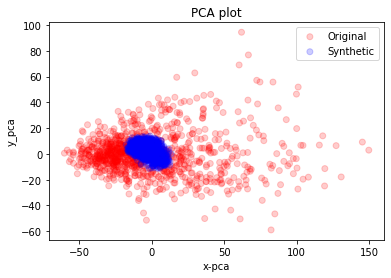

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.008s...
[t-SNE] Computed neighbors for 2000 samples in 0.408s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 3.227009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.234940
[t-SNE] KL divergence after 300 iterations: 1.177667


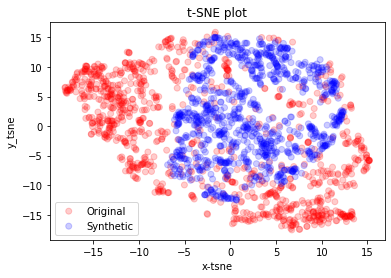

In [11]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')